In [1]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('titanic.csv')

In [3]:
train.isnull().sum()

Survived                   0
Pclass                     2
Name                       0
Sex                        3
Age                        2
Siblings/Spouses Aboard    0
Parents/Children Aboard    1
Fare                       2
dtype: int64

<AxesSubplot:>

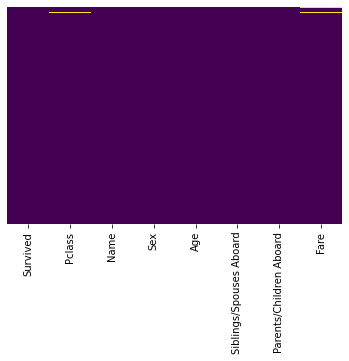

In [4]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

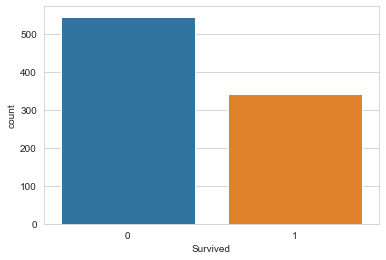

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

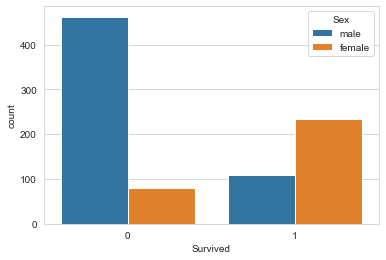

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

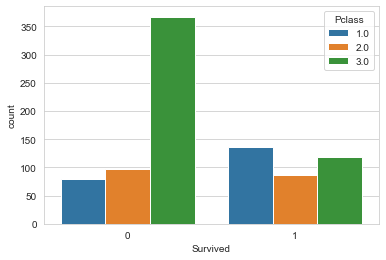

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

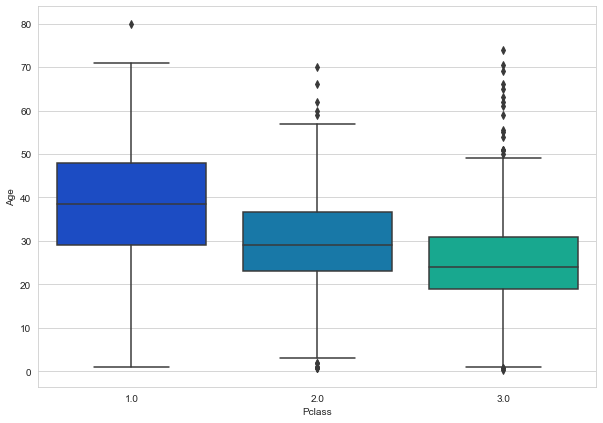

In [8]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [11]:
def impute_pclass(c):
    Pclass = c[0]
    Age = c[1]
    if pd.isnull(Pclass):
        if Age == 37:
            return 1
        elif Age == 29:
            return 2
        else:
            return 3
    else:
        return Pclass

In [12]:
train['Pclass'] = train[['Pclass','Age']].apply(impute_pclass,axis=1)

<AxesSubplot:>

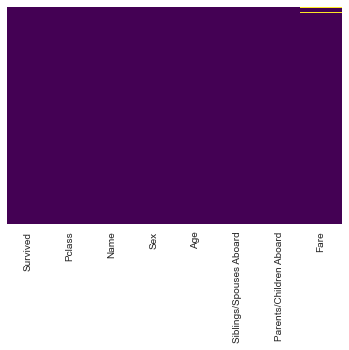

In [13]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

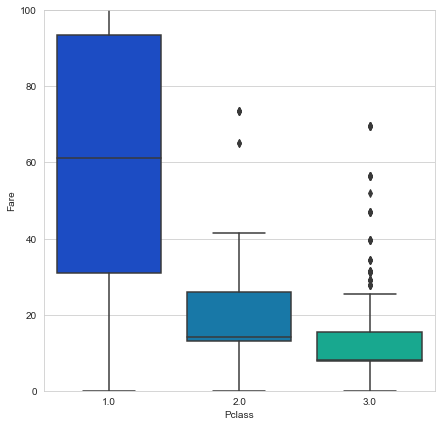

In [14]:
plt.figure(figsize=(7, 7))
plt.ylim(0,100)
sns.boxplot(x='Pclass',y='Fare',data=train,palette='winter')

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    float64
 2   Name                     887 non-null    object 
 3   Sex                      884 non-null    object 
 4   Age                      885 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  886 non-null    float64
 7   Fare                     885 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 55.6+ KB


In [16]:
def impute_fare(cols):
    Fare = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Fare):

        if Pclass == 1:
            return 61.1

        elif Pclass == 2:
            return 16.666

        else:
            return 10.576

    else:
        return Fare

In [17]:
train['Fare'] = train[['Fare','Age']].apply(impute_fare,axis=1)

<AxesSubplot:>

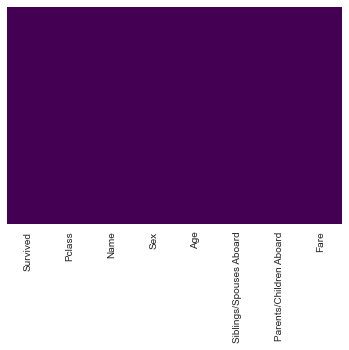

In [18]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

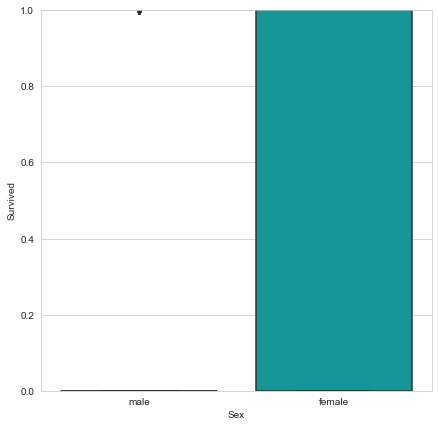

In [19]:
plt.figure(figsize=(7, 7))
plt.ylim(0,1)
sns.boxplot(x='Sex',y='Survived',data=train,palette='winter')

In [20]:
def impute_sex(cols):
    sex = cols[0]
    survived = cols[1]
    
    if pd.isnull(sex):

        if survived == 1:
            return "Female"
        else:
            return "male"

    else:
        return sex

In [21]:
train['Sex'] = train[['Sex','Survived']].apply(impute_sex,axis=1)

<AxesSubplot:>

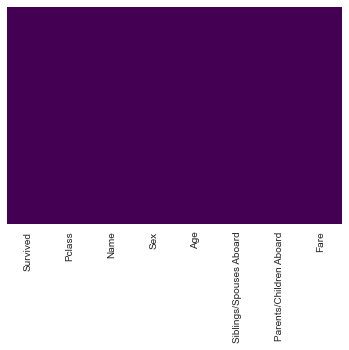

In [22]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [23]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 23

    else:
        return Age

In [24]:
train['Age'] = train[['Age','Pclass']].apply(impute_pclass,axis=1)

<AxesSubplot:>

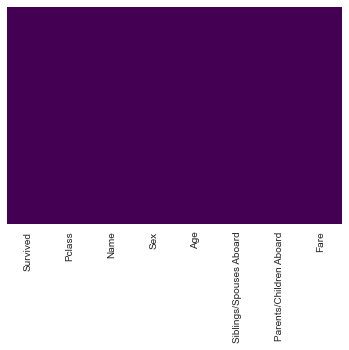

In [25]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Pclass', ylabel='Parents/Children Aboard'>

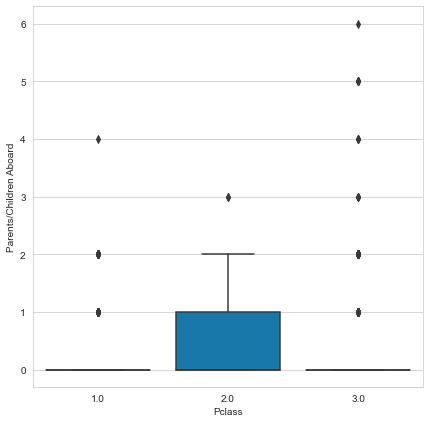

In [26]:
plt.figure(figsize=(7, 7))
sns.boxplot(x='Pclass',y='Parents/Children Aboard',data=train,palette='winter')

In [27]:
def impute_parents(cols):
    parents = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(parents):

        if Pclass == 2:
            return 1
        else:
            return 0

    else:
        return parents
train['Parents/Children Aboard'] = train[['Parents/Children Aboard','Pclass']].apply(impute_pclass,axis=1)

<AxesSubplot:>

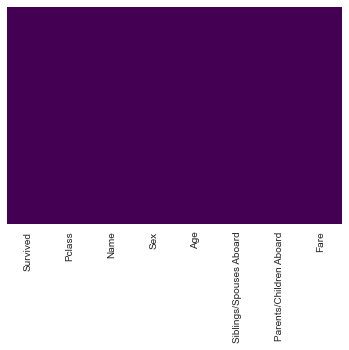

In [28]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    float64
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    float64
 7   Fare                     887 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 55.6+ KB


In [30]:
train.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64